In [1]:
## Abstractions
import numpy as np
import pandas as pd

## Plotting
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pylab as pl

## Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.linear_model import LogisticRegression

## Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import det_curve

## Timing
import time

# Model
from BayesianLogisticRegression_SOSGD import MAPEstimator

Import Data

In [2]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [3]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('src/clean2.data')
df.columns = headers

In [4]:
X = np.asarray(df.iloc[:,2:-1])
y = np.asarray(df.iloc[:,-1])

Standard Scaler

In [5]:
X_std = StandardScaler().fit_transform(X)

Train and Test Model

In [17]:
clf = MAPEstimator(w_D = np.zeros(166), solver='so', step_size=0.1, alpha=0.000001, max_iter = 100, tol = 1e-6)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [18]:
score = clf.score(X_std, y)
score

0.9621039866606033

In [19]:
np.dot(clf.w, np.hstack((1, X_std[1]))) 

5.632486201529797

In [20]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [21]:
clf.iteration_count

80

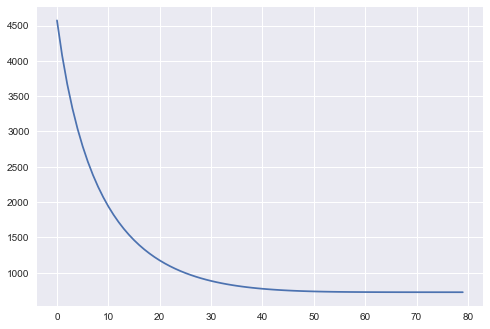

In [22]:
plt.plot(clf.loss_array)

In [ ]:
clf = MAPEstimator(w_D = np.zeros(166), step_size=0.000001, alpha=0.000001, max_iter = 10000000, tol = -1, step_size_type = 'differential')
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [ ]:
score = clf.score(X_std, y)
score

In [ ]:
(np.sum(y==0)) / len(y)

In [ ]:
clf.iteration_count

In [ ]:
plt.plot(clf.loss_array)

Model Evaluation

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

In [ ]:
iteration_counts = []
test_scores = []

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000)
    clf.fit(X_train,y_train)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test)
    test_scores.append(score)
    

In [ ]:
test_scores

In [ ]:
iteration_counts

In [ ]:
basic_test_scores = test_scores

In [ ]:
basic_iteration_counts = iteration_counts

In [ ]:
np.mean(basic_test_scores)

In [ ]:
np.mean(basic_iteration_counts)

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

In [ ]:
iteration_counts = []
test_scores = []

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000, step_size_type = 'differential')
    clf.fit(X_train,y_train)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test)
    test_scores.append(score)
    

In [ ]:
test_scores

In [ ]:
iteration_counts

In [ ]:
differential_test_scores = test_scores

In [ ]:
differential_iteration_counts = iteration_counts

In [ ]:
np.mean(differential_test_scores)

In [ ]:
np.mean(differential_iteration_counts)

In [ ]:
plot_test_scores = np.array([np.mean(basic_test_scores),np.mean(differential_test_scores)])

In [ ]:
plot_iteration_counts = np.array([np.mean(basic_iteration_counts), np.mean(differential_iteration_counts)])

In [ ]:
plot_test_scores = np.array([basic_test_scores, differential_test_scores])

In [ ]:
plot_iteration_counts = np.array([basic_iteration_counts, differential_iteration_counts])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(['basic','differential'],plot_test_scores)
ax2.plot(['basic','differential'], plot_iteration_counts)

In [ ]:
plt.boxplot(np.transpose(plot_test_scores), labels = ['static', 'dynamic'])
plt.title('Held-out Accuracy Rates by Weight Update Scheme')
plt.ylabel('Accuracy Rate on Held-out Data')

In [ ]:
plt.boxplot(np.transpose(plot_iteration_counts), labels = ['static', 'dynamic'])
plt.ylabel('Number of Iterations until Convergence (Millions)')

In [ ]:
plot_test_scores

In [ ]:
plt.plot(clf.loss_array)

In [ ]:
clf = LogisticRegression(penalty="none", solver = 'sag', max_iter = 100000)

In [ ]:
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [ ]:
score = clf.score(X_std, y)
score

In [ ]:
sk_weights = clf.coef_[0]

In [ ]:
clf.w_D

In [ ]:
clf.intercept_

In [ ]:
clf.c

In [ ]:
y_pred = clf.predict_proba(X_std)

In [ ]:
RocCurveDisplay.from_predictions(y, y_pred)

In [ ]:
fpr, fnr, thresholds = det_curve(y, y_pred)

In [ ]:
fpr

In [ ]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)

In [7]:
vec = np.array([1,2,3, 4])

In [10]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,2,3])

In [17]:
(a @ b[:,np.newaxis]).shape

(3, 1)